## Exploratory analysis of the dependend variables

In [7]:
import pandas as pd 
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [8]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Antonio Mbunh,12,1,2,2,0,2,2,0,4,4,0
1,Bulna Ntumba,12,3,1,1,0,3,3,6,7,7,0
2,Nghala Pungana,12,1,1,1,2,3,1,2,4,4,0
3,Samba Ndum,12,1,1,2,4,9,9,18,18,18,0
4,Tomas Isnaba,12,2,2,3,3,4,4,5,8,8,1


In [9]:
# Group by 'id' and calculate average (if necessary)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Remove the 'id' column to perform the PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

data_frame_combinado_dep_grouped.dropna()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,Alamada Bia,2.0,2.0,4.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
2,Alanghate Mfumba,10.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,3.0,0.0
3,Albat Calabus,10.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
4,Americano Mbunde,19.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,9.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
125,Viriato Quintunda,12.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,5.0,5.0,2.0
126,Wangna Ntchoba,15.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0
127,Wilndan Tchuda,9.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0


In [10]:
## List of variables

# list Indeg = ['Degree_Rede_EntreajudaLabur' ,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']
# list OutDeg = ['Degree_Rede_EntreajudaLabur', 'OutDeg_Var.Dep_RedeControlExtAusencia',    'OutDeg_Var.Dep_ApoioSpecDiqCint',  'OutDeg_Var.Dep_ApoioSpecTubos',    'OutDeg_Var.Dep_RedApoiLevntDiCin', 'OutDeg_RedCont_DiqPriqDiqCint',    'OutDeg_RedeRepar_DiqPriqDiqCint'   ,'OutDeg_Red-Val_Cont1Rep2DiqCin',  'OutDeg_Red-Val_Cont1Rep2DiqPrq',   'OutDeg_ContRep2_DiqPrqCin',    'OutDeg_Var.Dep_RedePartilhaAgu']

data_for_pca = data_frame_combinado[['Degree_Rede_EntreajudaLabur' ,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']] # Estas son las variables
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

        PC1       PC2                id
0 -0.444698 -0.099490       Aiace Quior
1  1.485596 -1.409609       Alamada Bia
2 -0.155348 -0.180784  Alanghate Mfumba
3  9.543775 -1.543889     Albat Calabus
4  3.181167  0.895719  Americano Mbunde


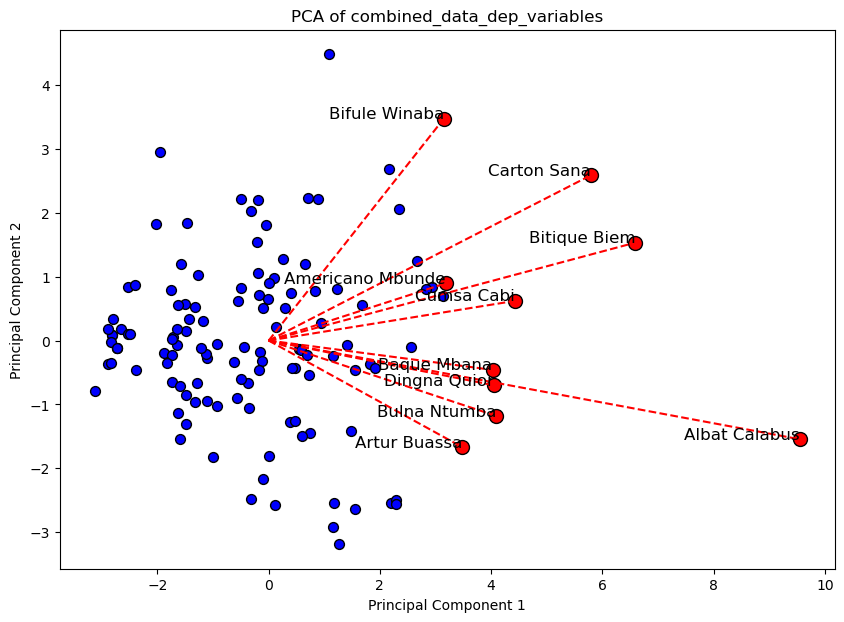

In [11]:

# Perform PCA
pca = PCA(n_components=2)  # Change n_components based on your needs
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Display the first rows of the principal components DataFrame
print(principal_df.head())

# Select the most relevant IDs (e.g., the 5 highest absolute values of PC1). NOTE: Change this value if you want to explore more.
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Add lines and labels for the most relevant IDs
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


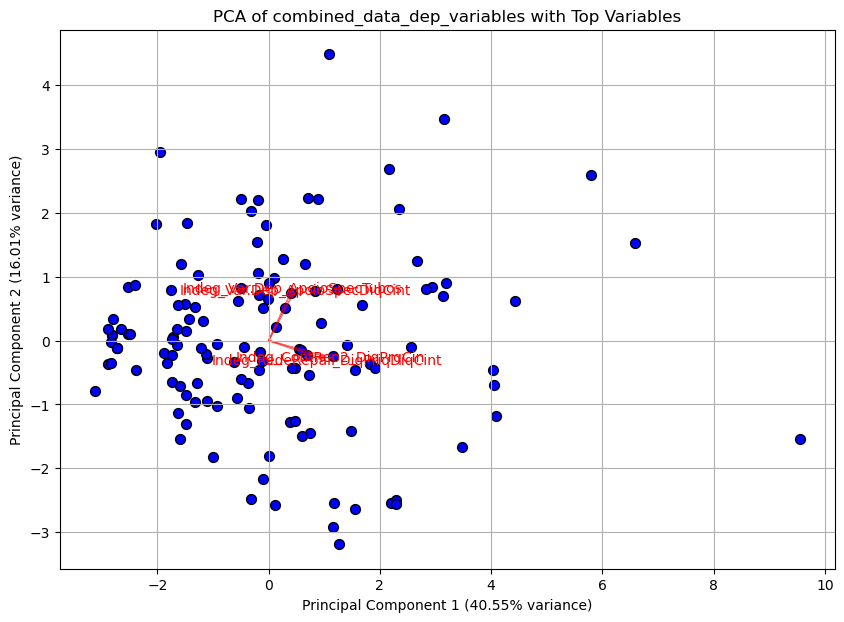

In [12]:
# Calculate the contribution of each variable to the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Select the most relevant variables (e.g., the 5 with the highest contribution to PC1 and PC2). 
# NOTE: Change this value if you want to explore more.
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_

# Add lines and labels for the most relevant variables
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()


In [13]:
data_for_pca.head()

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,12,1,2,2,0,2,2,0,4,4,0
1,12,3,1,1,0,3,3,6,7,7,0
2,12,1,1,1,2,3,1,2,4,4,0
3,12,1,1,2,4,9,9,18,18,18,0
4,12,2,2,3,3,4,4,5,8,8,1


In [14]:
print(top_vars)

{'Indeg_RedeRepar_DiqPriqDiqCint', 'Indeg_Var.Dep_ApoioSpecDiqCint', 'Indeg_Var.Dep_ApoioSpecTubos', 'Indeg_ContRep2_DiqPrqCin'}


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

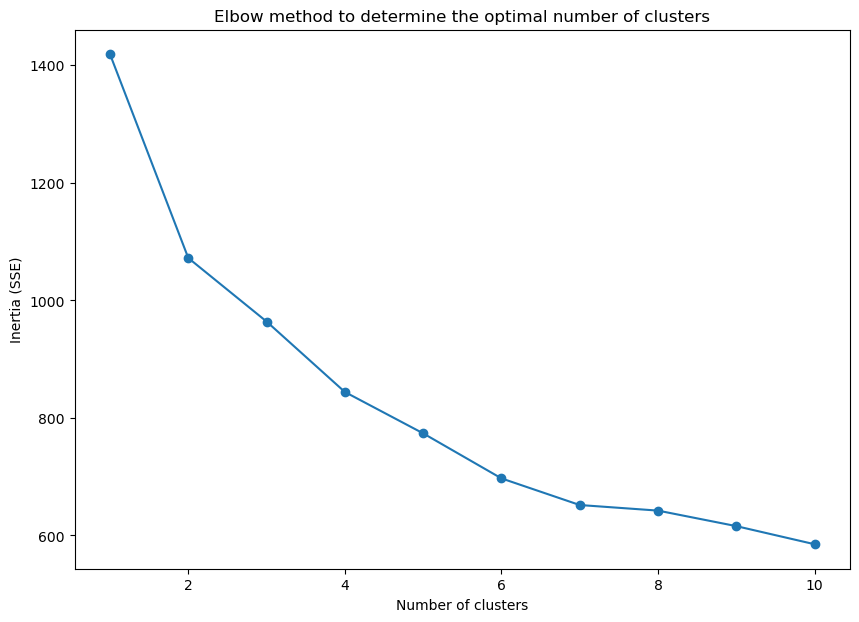

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# detelete column 'id'
data_for_clustering = data_for_pca

# Scale the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determining the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the result
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


File successfully saved at ../Results/pca_kmeans_results_dep_variables.xlsx.


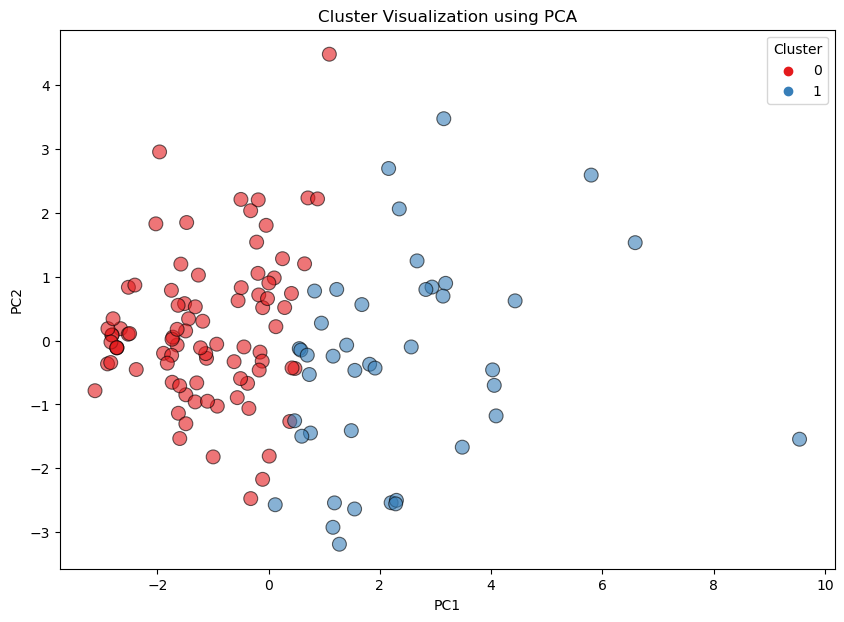

In [16]:
# Apply K-Means with the optimal number of clusters (choose k based on the elbow plot)
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_dep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Count the number of elements in each cluster
cluster_counts = data_frame_combinado_dep_grouped['Cluster'].value_counts()

# Define a threshold for small clusters (e.g., fewer than 10 elements)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Merge small clusters into an "Other" cluster
data_frame_combinado_dep_grouped['Cluster'] = data_frame_combinado_dep_grouped['Cluster'].apply(lambda x: 'Other' if x in small_clusters else x)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_dep_grouped['Cluster']

# Export results to an Excel file
output_path = "../Results/pca_kmeans_results_dep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_dep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"File successfully saved at {output_path}.")
except Exception as e:
    print(f"Error saving the file: {e}")

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Cluster Visualization using PCA')
plt.show()


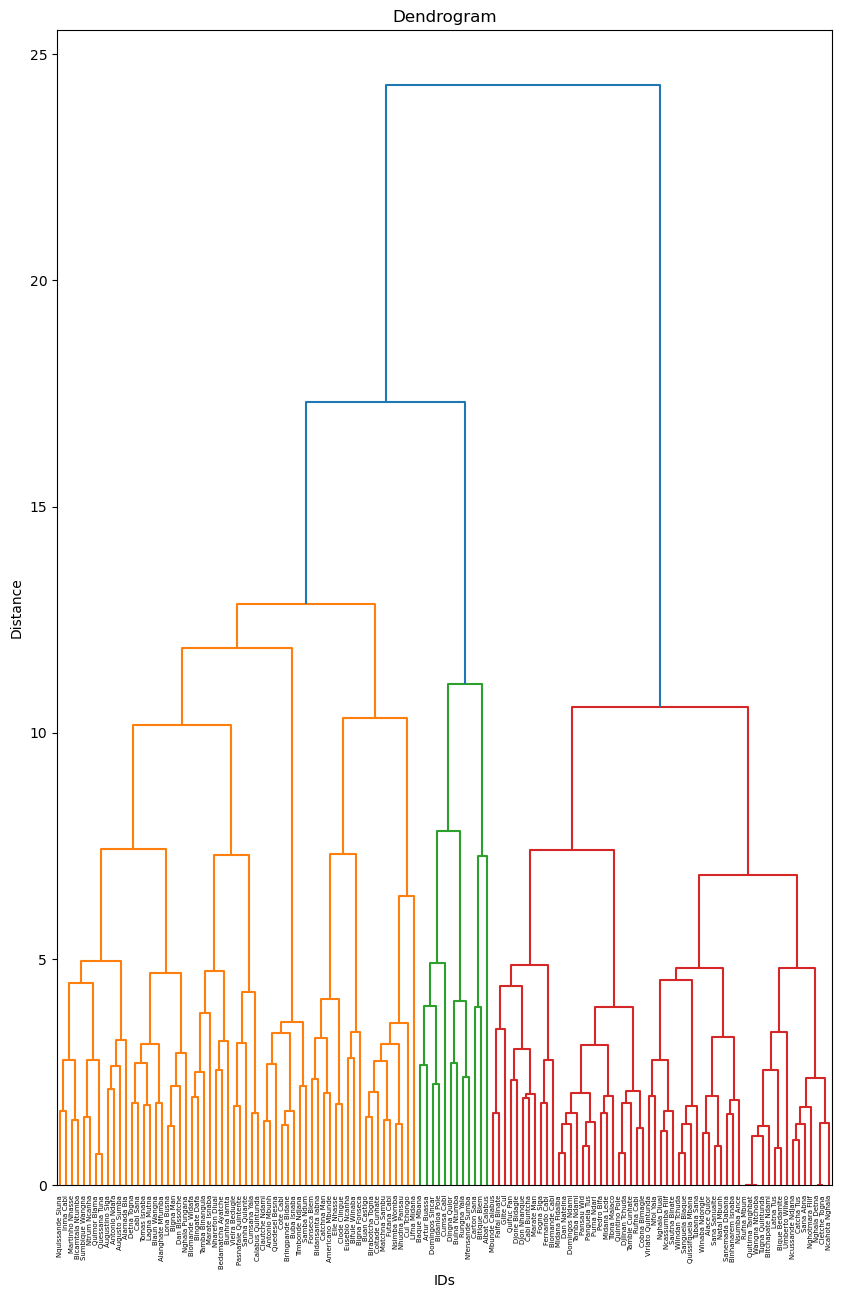

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the link for the dendrogram using the 'ward' method
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 15))
dendrogram(linked, orientation='top', labels=data_frame_combinado_dep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Exploratory analysis of independen data

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [19]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep

,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Antonio Mbunh,1,1,0,0,0,5,2,2,1,...,Ntchugal,1,0,38,2,1.0,4,9,0,1.9217
1,Bulna Ntumba,0,0,0,4,0,1,1,4,1,...,Ntchugal,1,0,66,3,2.0,4,0,0,1.8387
2,Nghala Pungana,0,0,4,0,0,3,2,2,1,...,Ntchugal,1,0,57,2,1.0,2,1,0,1.6564
3,Samba Ndum,0,0,4,0,0,9,8,5,4,...,Ntchugal,0,0,52,2,1.0,5,5,0,2.6717
4,Tomas Isnaba,0,0,4,0,0,8,3,6,3,...,Ntchugal,0,0,50,2,1.0,5,19,2,2.2281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Bedamatcha Ayatche,0,0,0,0,0,17,13,0,4,...,Fanhi,1,0,39,2,1.0,4,5,1,0.3036
125,Nfensande Sumba,0,0,2,0,0,4,2,0,1,...,Fanhi,1,0,53,2,2.0,2,1,0,0.1771
126,Nsumba Ance,0,0,0,0,0,4,4,0,1,...,Fanhi,1,0,35,1,1.0,3,0,0,0.7046
127,Rufna Cabi,0,0,2,0,0,3,0,0,2,...,Fanhi,0,0,46,2,2.0,3,2,1,0.9873


In [20]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to transform
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])

# Now the columns '1_VarExp_Moranca' and '2_VarExp_Atri_Tabanca' are transformed into numeric values
print(data_frame_combinado_indep.head())


               id  OutDeg_RedConfltAgu  Degree_RedConfliAgu  \
0   Antonio Mbunh                    1                    1   
1    Bulna Ntumba                    0                    0   
2  Nghala Pungana                    0                    0   
3      Samba Ndum                    0                    0   
4    Tomas Isnaba                    0                    0   

   Degree_RedeIrmonsPr  OutDeg_PaiTiopaterC  OutDeg_TiosMaternos  \
0                    0                    0                    0   
1                    0                    4                    0   
2                    4                    0                    0   
3                    4                    0                    0   
4                    4                    0                    0   

   Degree_IntimAmigUnd  OutDeg_IntimAmigos_  OutDeg_RedeRisk_Cen  \
0                    5                    2                    2   
1                    1                    1                    4   
2       

In [21]:
# Group by 'id' and calculate average 
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Remove the 'id' column to perform the PCA

data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])
data_for_pca = data_for_pca[['OutDeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
 'OutDeg_PaiTiopaterC','OutDeg_TiosMaternos','Degree_IntimAmigUnd',
'OutDeg_IntimAmigos_','OutDeg_RedeRisk_Cen','OutDeg_RedeConfianc',
'Degree_RedeConflitA','Degree_RedeConflitG','OutDeg_VendaParcela',
'OutDeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
'2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
'5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
'8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]

# data_for_pca = data_for_pca[['OutDeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'OutDeg_PaiTiopaterC','OutDeg_TiosMaternos','Degree_IntimAmigUnd',
# 'OutDeg_IntimAmigos_','OutDeg_RedeRisk_Cen','OutDeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','OutDeg_VendaParcela',
# 'OutDeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


# data_for_pca = data_for_pca[['Indeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'Indeg_PaiTiopaterC','Indeg_TiosMaternos','Degree_IntimAmigUnd',
# 'Indeg_IntimAmigos_','Indeg_RedeRisk_Cen','Indeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','Indeg_VendaParcela',
# 'Indeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro','Data_area',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


data_for_pca

,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,0.0,0.0,3.0,0.0,0.0,8.0,2.0,3.0,2.0,0.0,...,2.0,0.0,0.0,53.0,2.0,1.0,3.0,3.0,0.0,2.3644
1,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,...,1.0,0.0,0.0,37.0,2.0,1.0,1.0,0.0,0.0,0.5087
2,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,25.0,1.0,1.0,4.0,3.0,1.0,1.4640
3,0.0,0.0,0.0,0.0,2.0,6.0,4.0,1.0,2.0,0.0,...,0.0,1.0,0.0,48.0,2.0,2.0,4.0,3.0,0.0,1.5186
4,0.0,0.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,30.0,1.0,1.0,2.0,1.0,0.0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.0,3.0,0.0,0.0,0.0,9.0,4.0,8.0,1.0,0.0,...,2.0,1.0,0.0,52.0,2.0,2.0,4.0,16.0,1.0,4.7238
125,0.0,0.0,4.0,0.0,0.0,12.0,5.0,2.0,2.0,0.0,...,2.0,1.0,0.0,51.0,2.0,3.0,2.0,7.0,0.0,5.3823
126,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0,...,2.0,1.0,0.0,78.0,3.0,2.0,1.0,1.0,0.0,2.9833
127,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,...,2.0,1.0,0.0,52.0,2.0,1.0,4.0,3.0,0.0,1.3262


        PC1       PC2                id
0 -0.443670  0.111546       Aiace Quior
1 -2.552965 -1.045535       Alamada Bia
2 -2.137825 -1.996643  Alanghate Mfumba
3 -0.986092  0.815409     Albat Calabus
4 -1.354149 -3.029918  Americano Mbunde


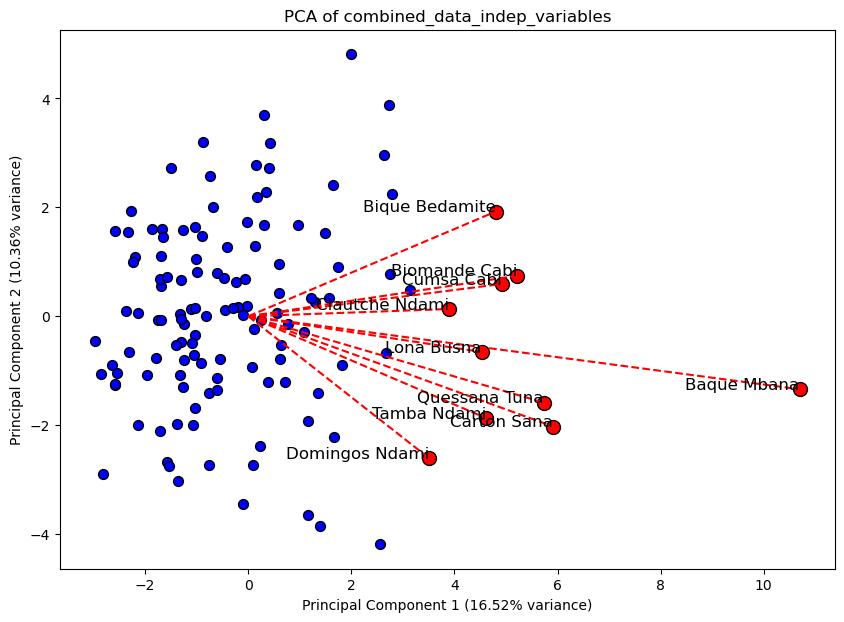

In [22]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Display the first rows of the principal components DataFrame
print(principal_df.head())

# Select the most relevant IDs (e.g., the 5 highest absolute values of PC1). NOTE: Change this value if you want to explore more.
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_

# Add lines and labels for the most relevant IDs
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')

plt.grid(False)
plt.show()


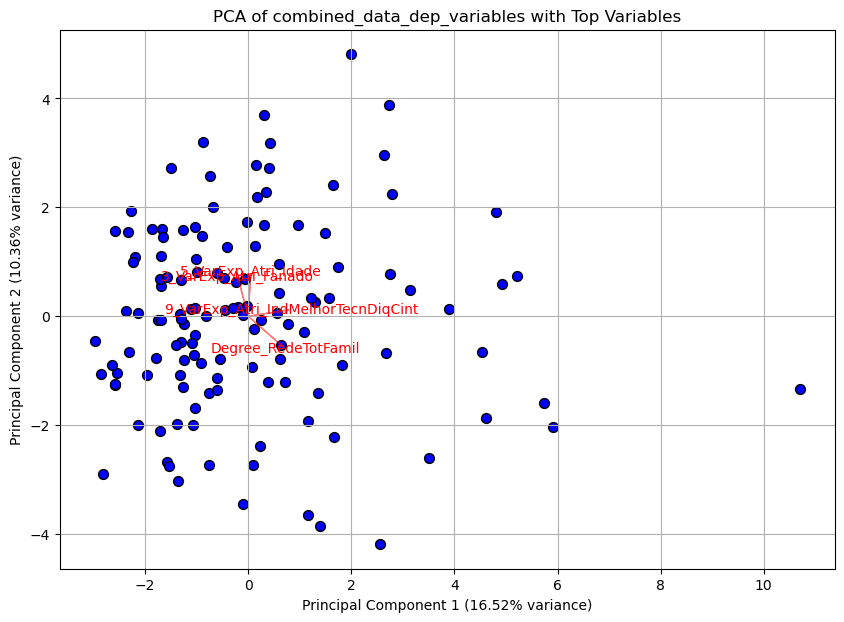

In [23]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calculate the contribution of each variable to the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Select the most relevant variables (e.g., the 5 with the highest contribution to PC1 and PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Add lines and labels for the most relevant variables
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()


In [24]:
print(top_vars)

{'Degree_RedeTotFamil', '9_VarExp_Atri_IndMelhorTecnDiqCint', '3_VarExp_Atri_Fanado', '5_VarExp_Atri_Idade'}


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

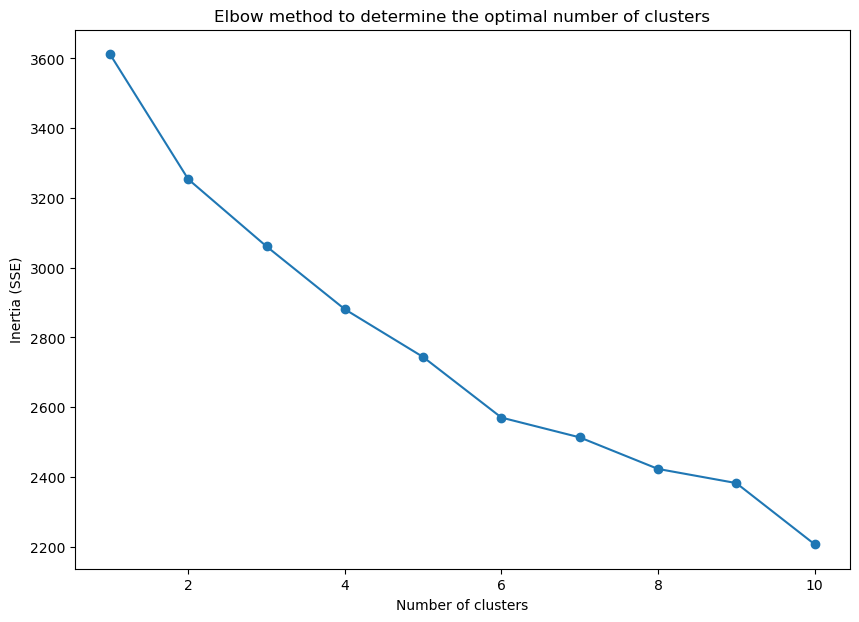

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'id' column
data_for_clustering = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()



c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


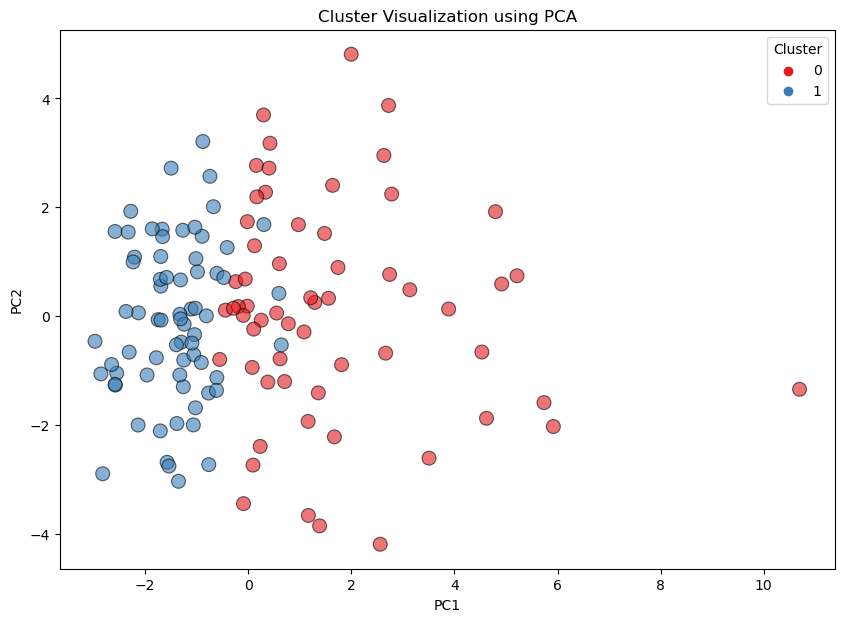

File successfully saved at ../Results/pca_kmeans_results_indep_variables.xlsx.


In [26]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply K-Means with the optimal number of clusters
optimal_k = 2  # Replace this value with the optimal number you determine from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_indep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Count the number of elements in each cluster
cluster_counts = data_frame_combinado_indep_grouped['Cluster'].value_counts()

# Define a threshold for small clusters (e.g., fewer than 2 elements)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Merge small clusters into an "Other" cluster
data_frame_combinado_indep_grouped['Cluster'] = data_frame_combinado_indep_grouped['Cluster'].apply(lambda x: 'Other' if x in small_clusters else x)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_indep_grouped['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Cluster Visualization using PCA')
plt.show()

# Export results to an Excel file
output_path = "../Results/pca_kmeans_results_indep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_indep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"File successfully saved at {output_path}.")
except Exception as e:
    print(f"Error saving the file: {e}")


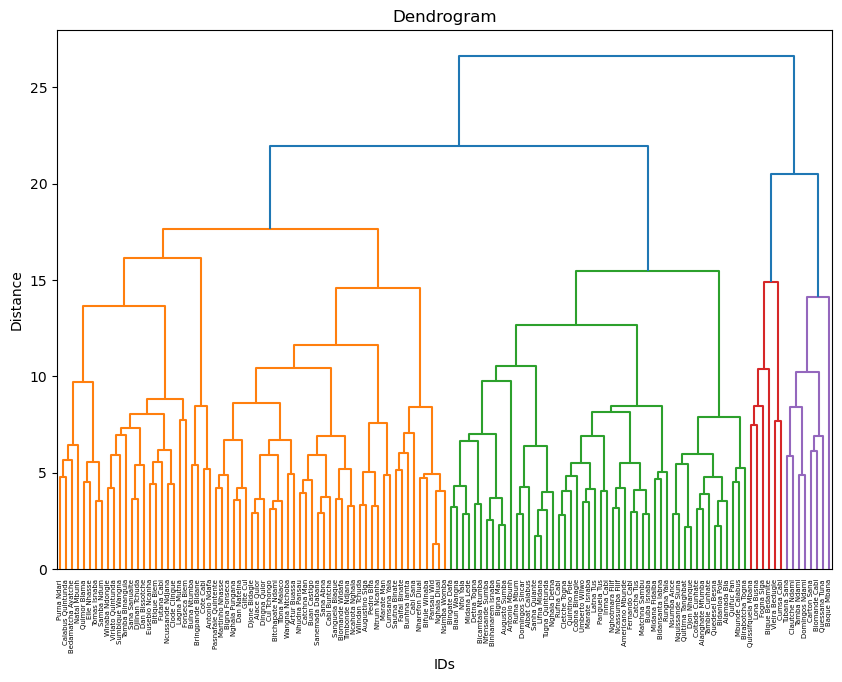

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_indep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Plots de las variables dependientes

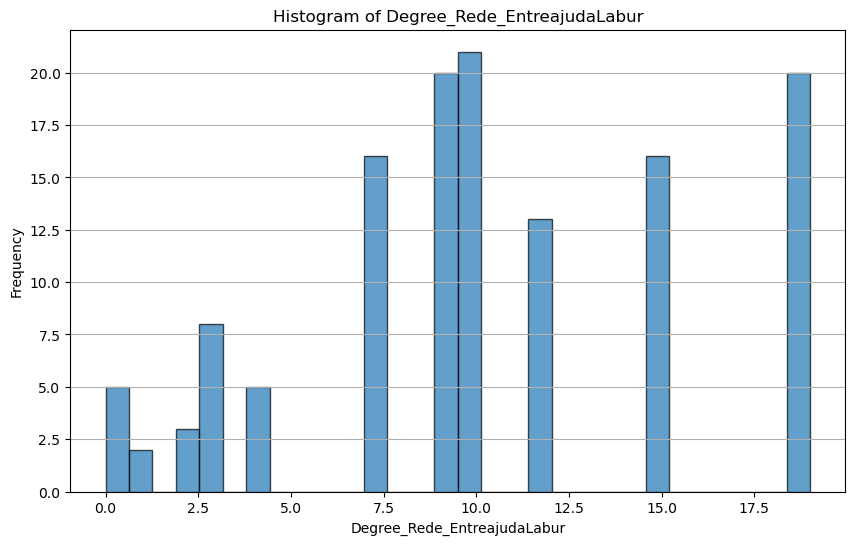

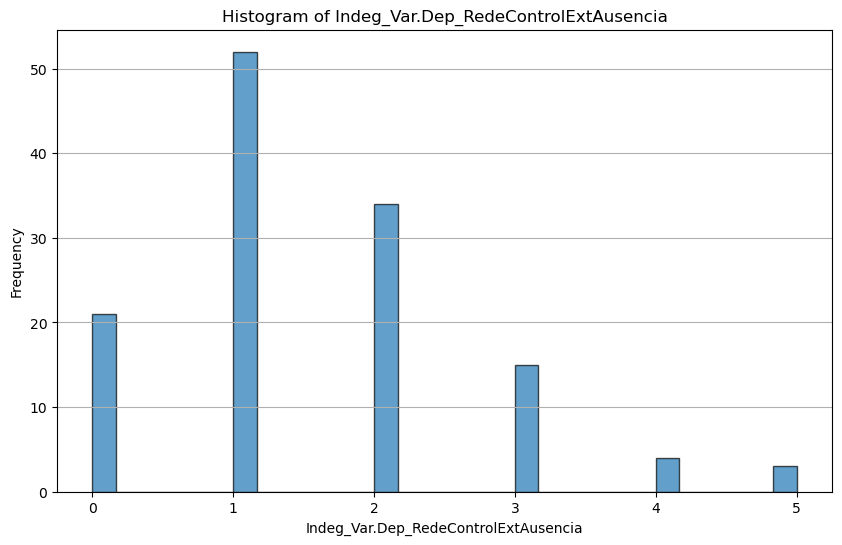

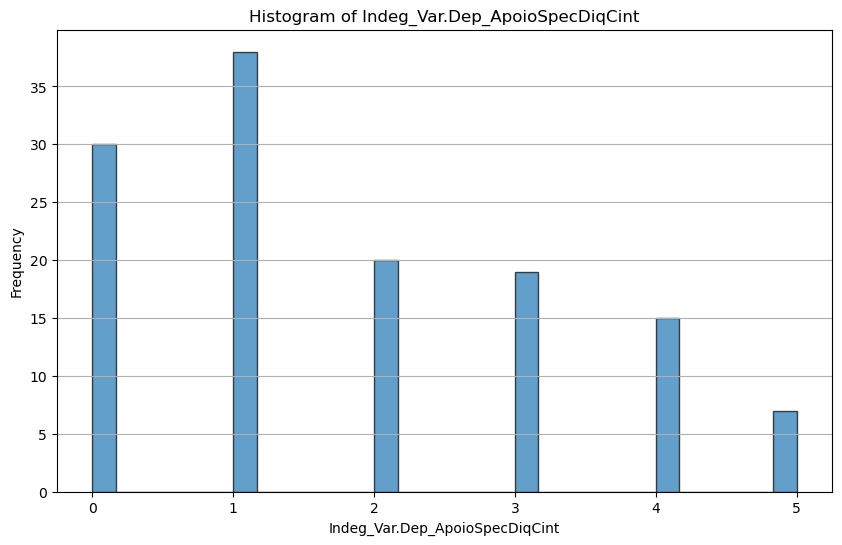

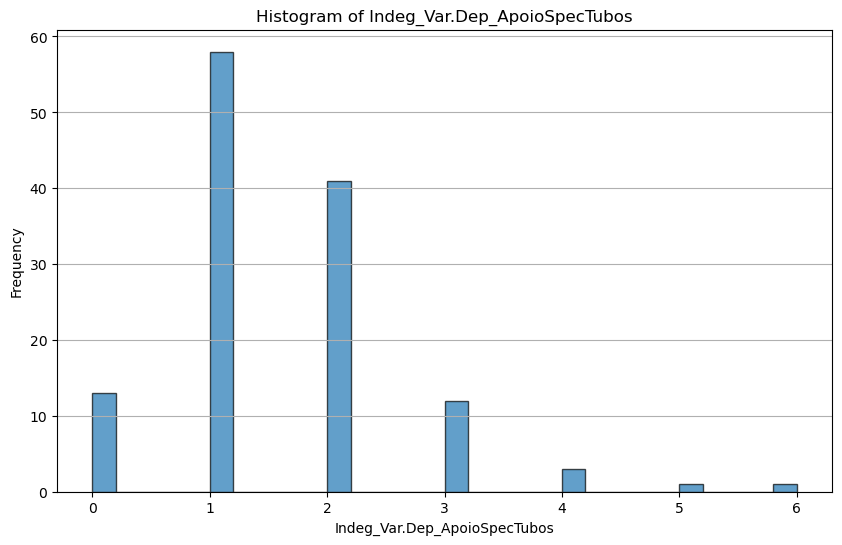

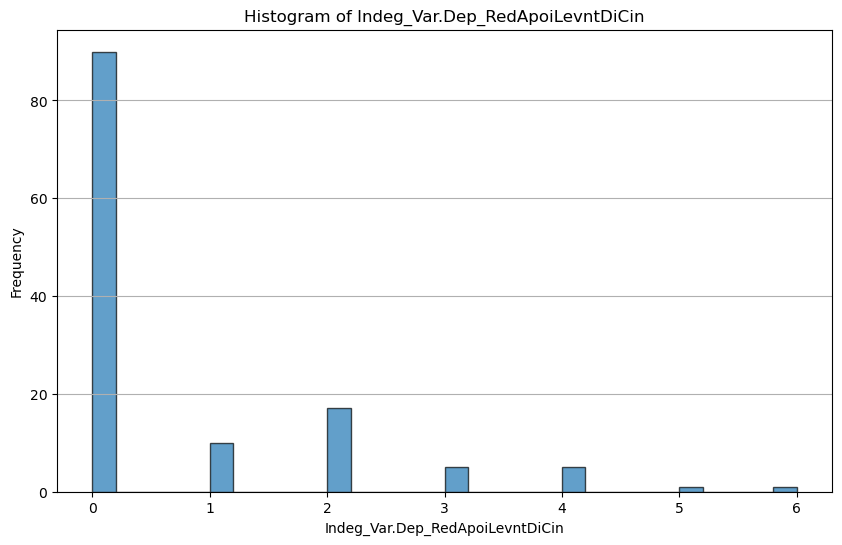

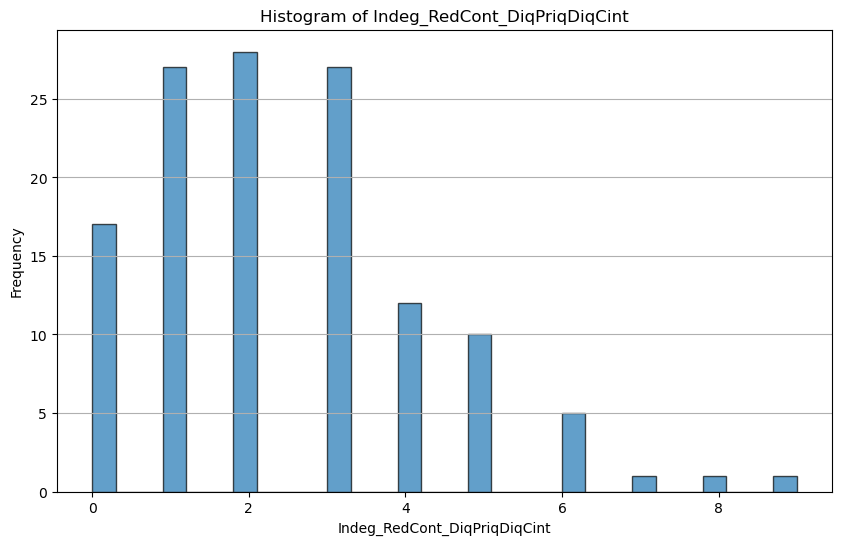

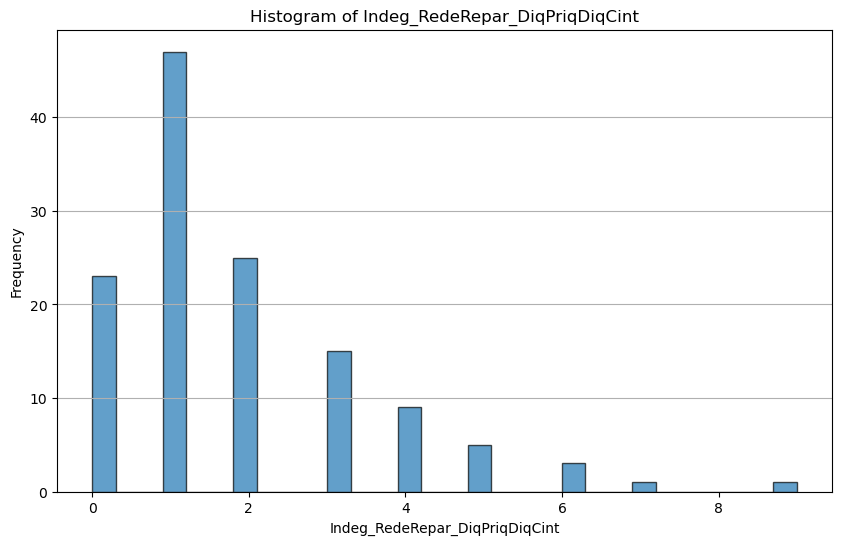

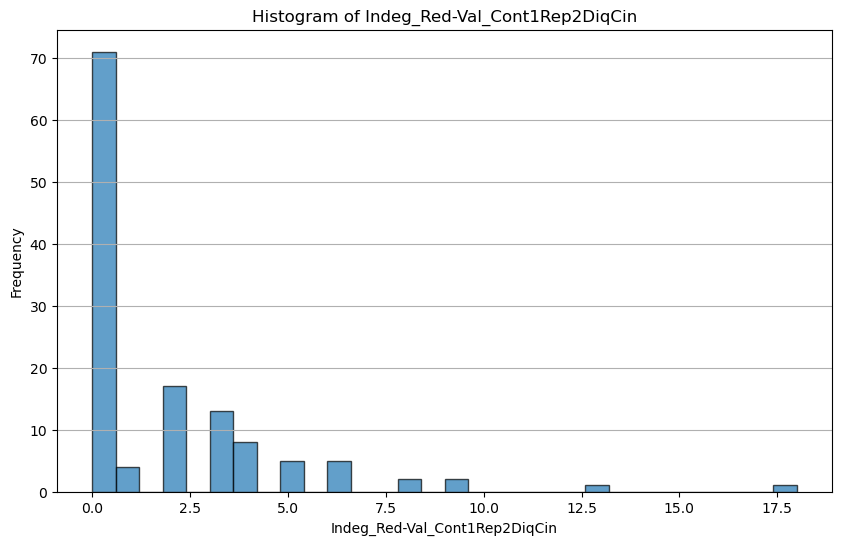

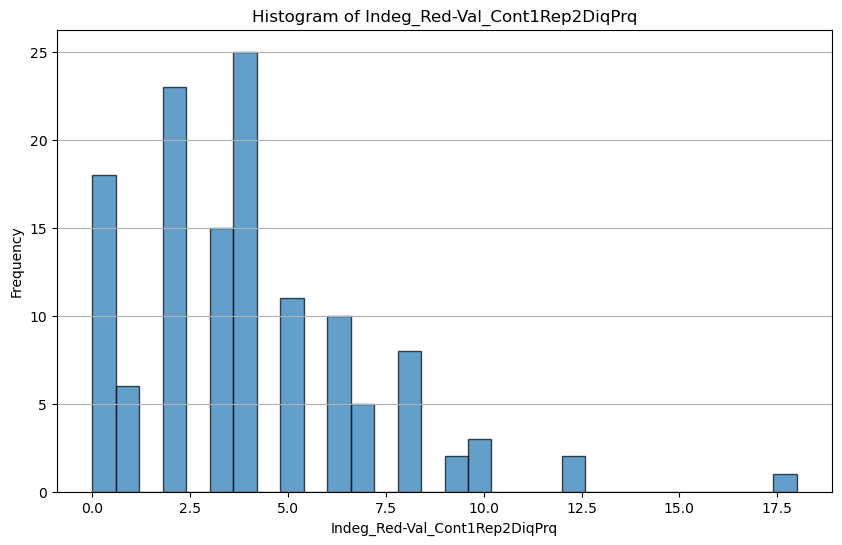

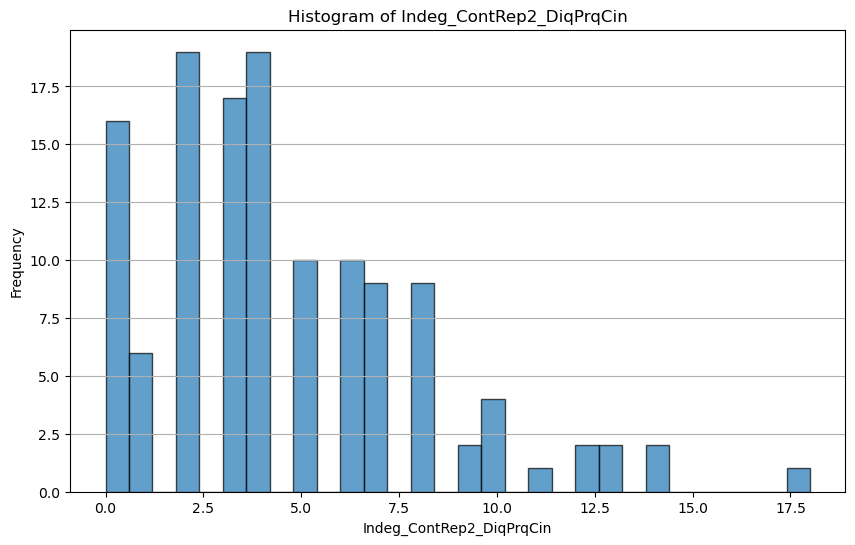

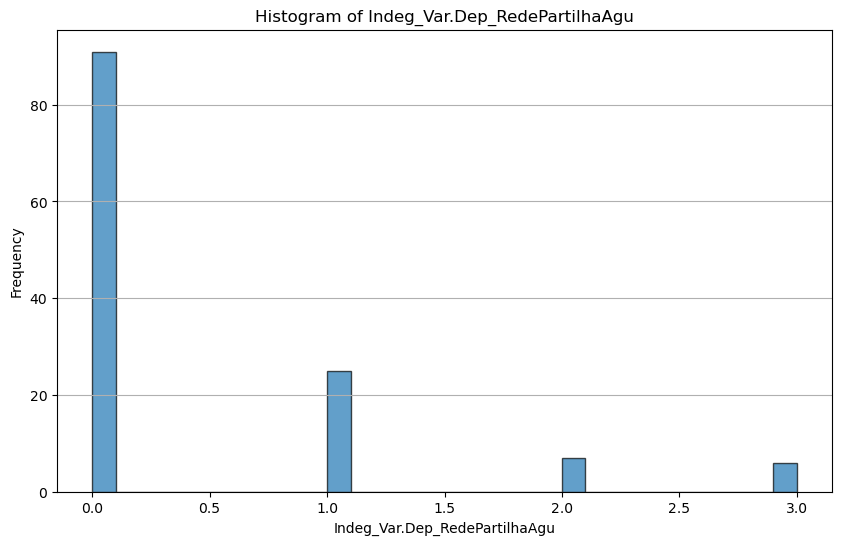

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Exclude the 'id' column
dep_vars_df = data_frame_combinado.drop(columns=['id'])

# Select the number of variables you want to plot
num_plots = 12  # Choose how many plots you want here. Be careful if you select too many, it will plot all of them.

# Create histograms for each selected dependent variable and save them
selected_columns = dep_vars_df.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    #plt.savefig(f'../DataIntermediate/histogram_{col}.png') # If you want to save the plot, remove the first # from this line.
    plt.show()



## Plots de las variables independientes

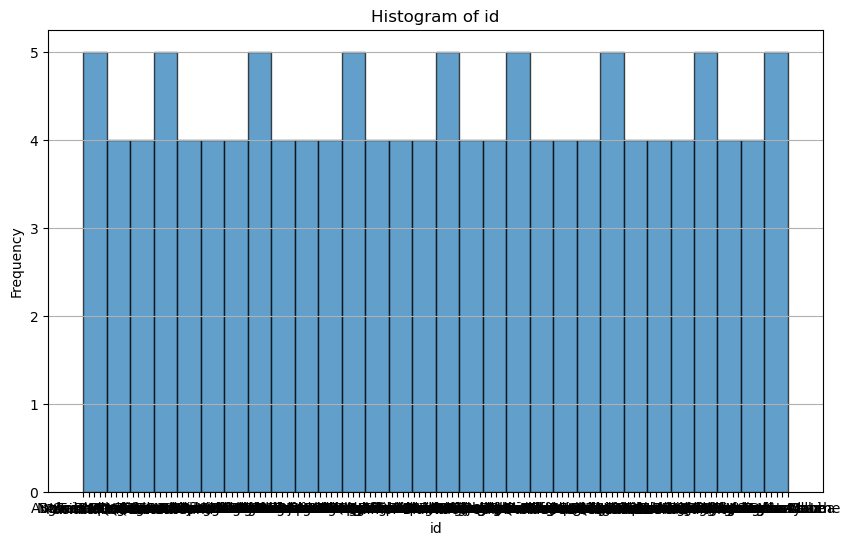

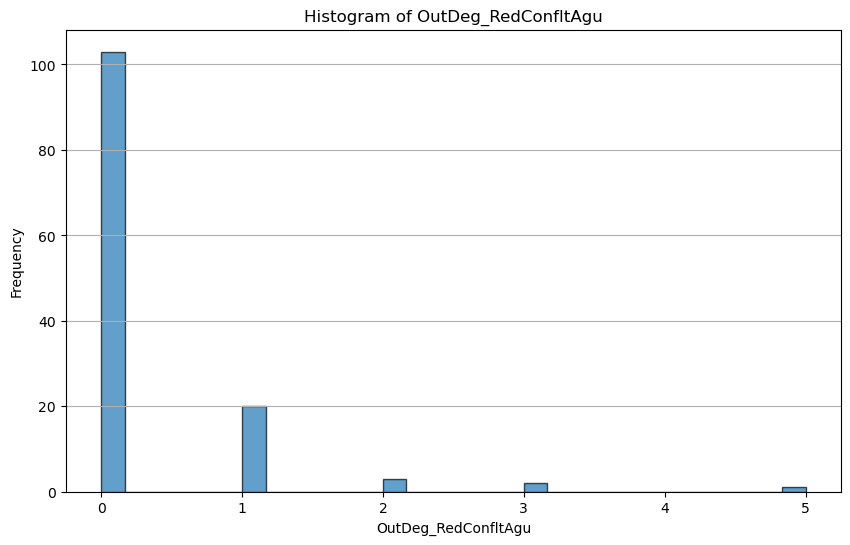

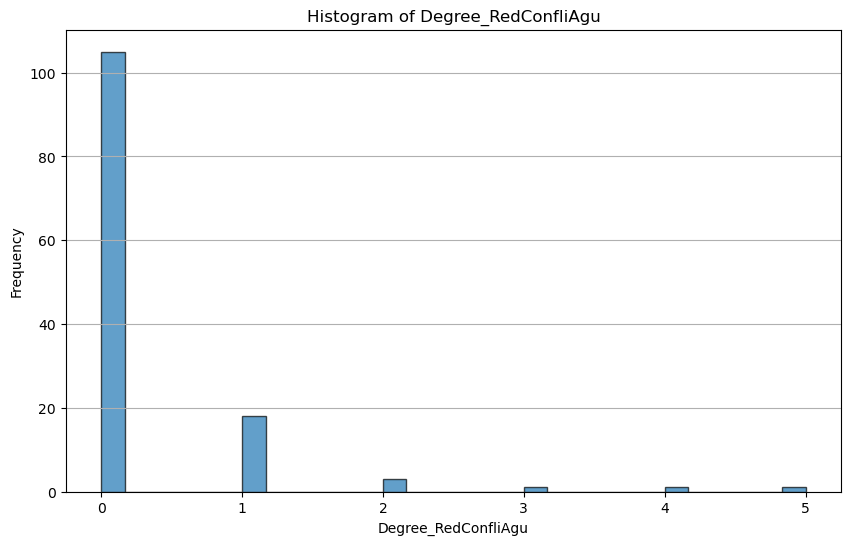

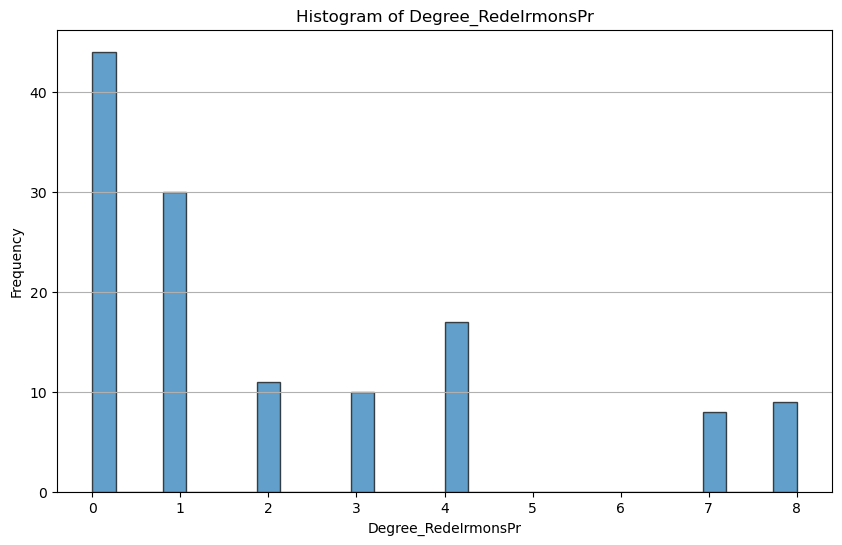

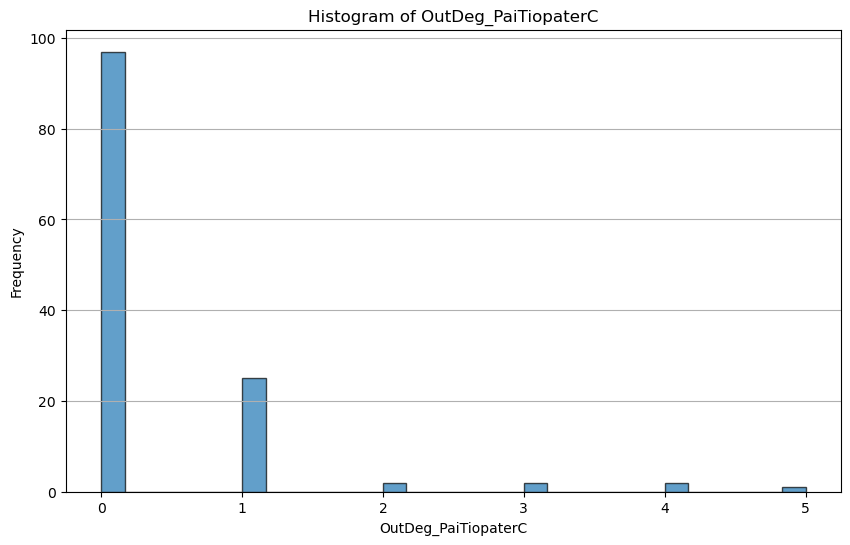

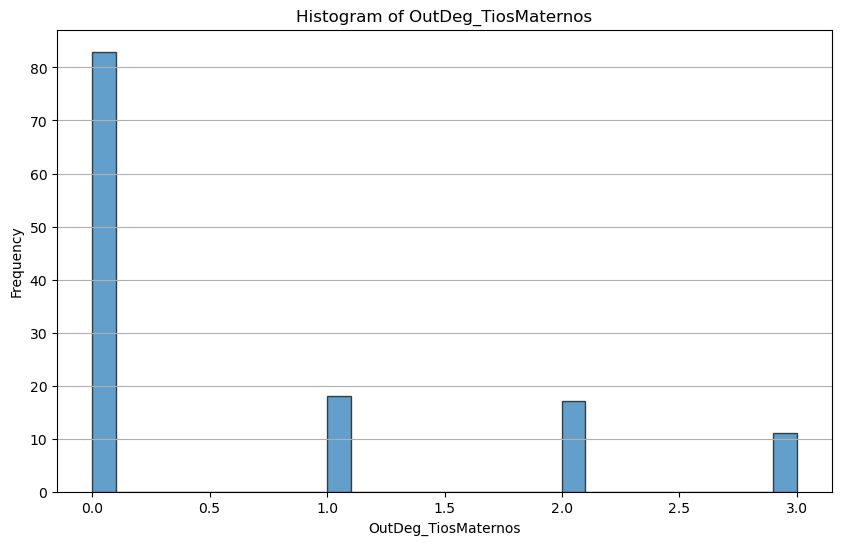

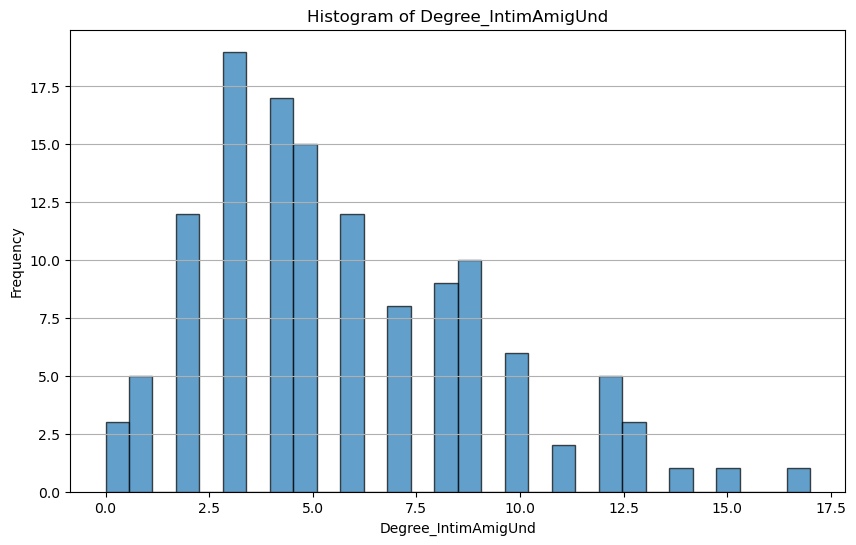

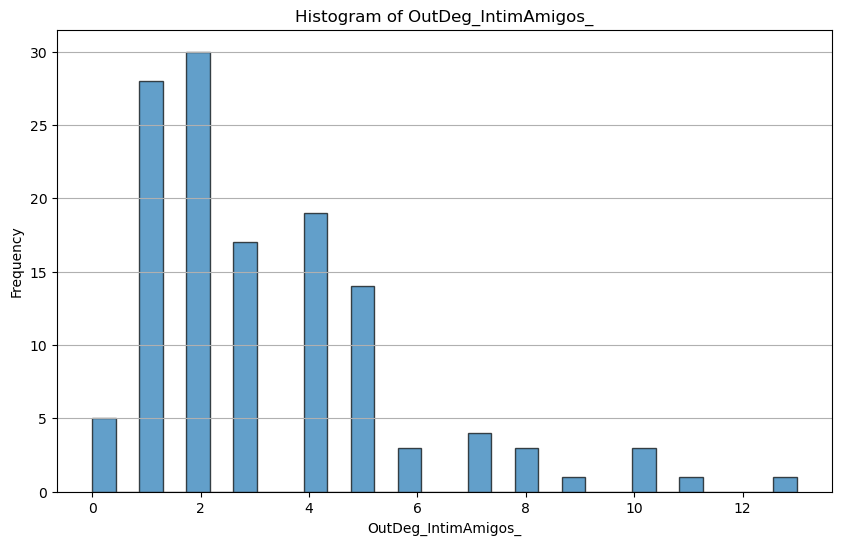

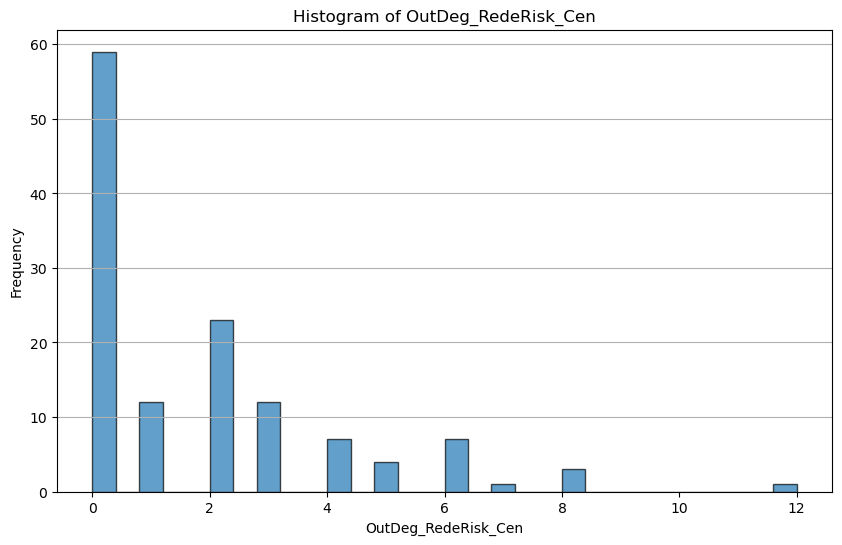

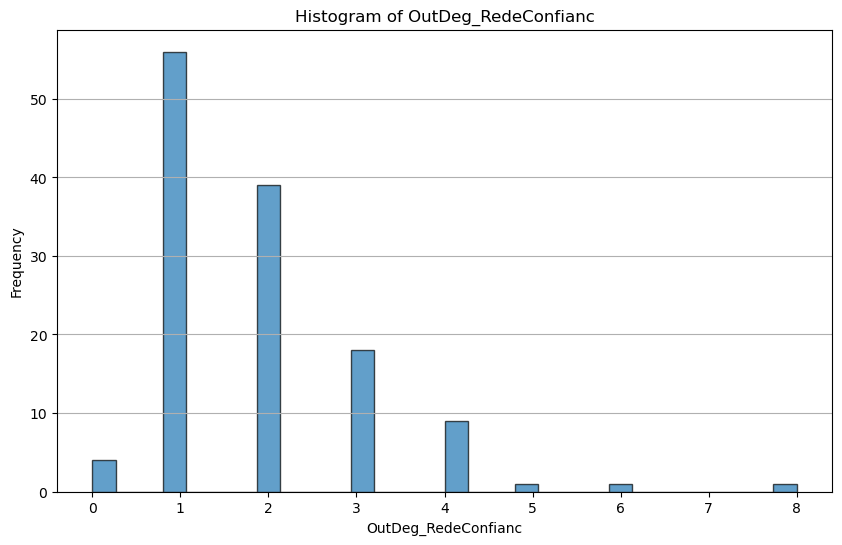

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Exclude the 'id' column
dep_vars_df_indep = data_frame_combinado_indep

# Select the number of variables you want to plot
num_plots = 10  # Choose how many plots you want here. Be careful if you select too many, it will plot all of them.

# Create histograms for each selected independent variable and save them
selected_columns = dep_vars_df_indep.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df_indep[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # If you want to save the plot, remove the first # from this line.
    plt.show()



## Correlation between the variables

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data frames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')



In [31]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to transform
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])


In [32]:
# Delete the 'id' column if present
data_frame_combinado_indep = data_frame_combinado_indep.drop(columns=['id'], errors='ignore')
data_frame_combinado_dep = data_frame_combinado_dep.drop(columns=['id'], errors='ignore')

# Calculate the correlation matrix between all variables.
combined_df = pd.concat([data_frame_combinado_dep, data_frame_combinado_indep], axis=1)


In [33]:
data_frame_combinado_indep

,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,1,1,0,0,0,5,2,2,1,0,...,2,1,0,38,2,1.0,4,9,0,1.9217
1,0,0,0,4,0,1,1,4,1,0,...,2,1,0,66,3,2.0,4,0,0,1.8387
2,0,0,4,0,0,3,2,2,1,0,...,2,1,0,57,2,1.0,2,1,0,1.6564
3,0,0,4,0,0,9,8,5,4,0,...,2,0,0,52,2,1.0,5,5,0,2.6717
4,0,0,4,0,0,8,3,6,3,0,...,2,0,0,50,2,1.0,5,19,2,2.2281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,0,0,0,0,17,13,0,4,0,...,1,1,0,39,2,1.0,4,5,1,0.3036
125,0,0,2,0,0,4,2,0,1,0,...,1,1,0,53,2,2.0,2,1,0,0.1771
126,0,0,0,0,0,4,4,0,1,0,...,1,1,0,35,1,1.0,3,0,0,0.7046
127,0,0,2,0,0,3,0,0,2,0,...,1,0,0,46,2,2.0,3,2,1,0.9873


In [34]:
print(data_frame_combinado_dep)

     Degree_Rede_EntreajudaLabur  Indeg_Var.Dep_RedeControlExtAusencia  \
0                             12                                     1   
1                             12                                     3   
2                             12                                     1   
3                             12                                     1   
4                             12                                     2   
..                           ...                                   ...   
124                           19                                     3   
125                           19                                     0   
126                           19                                     1   
127                           19                                     2   
128                            7                                     1   

     Indeg_Var.Dep_ApoioSpecDiqCint  Indeg_Var.Dep_ApoioSpecTubos  \
0                                 2       

In [35]:
combined_df.head()

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,12,1,2,2,0,2,2,0,4,4,...,2,1,0,38,2,1.0,4,9,0,1.9217
1,12,3,1,1,0,3,3,6,7,7,...,2,1,0,66,3,2.0,4,0,0,1.8387
2,12,1,1,1,2,3,1,2,4,4,...,2,1,0,57,2,1.0,2,1,0,1.6564
3,12,1,1,2,4,9,9,18,18,18,...,2,0,0,52,2,1.0,5,5,0,2.6717
4,12,2,2,3,3,4,4,5,8,8,...,2,0,0,50,2,1.0,5,19,2,2.2281


In [36]:
corr_matrix = combined_df.corr()

# Extract only the correlations between dependent and independent variables.
corr_dep_indep = corr_matrix.loc[data_frame_combinado_dep.columns, data_frame_combinado_indep.columns]

output_path = "../Results/correlations_all.csv"
os.makedirs("../Results/", exist_ok=True)
corr_dep_indep.to_csv(output_path, index=True)

print(corr_dep_indep)

                                      OutDeg_RedConfltAgu  \
Degree_Rede_EntreajudaLabur                      0.023779   
Indeg_Var.Dep_RedeControlExtAusencia             0.241026   
Indeg_Var.Dep_ApoioSpecDiqCint                   0.131070   
Indeg_Var.Dep_ApoioSpecTubos                     0.031698   
Indeg_Var.Dep_RedApoiLevntDiCin                  0.019206   
Indeg_RedCont_DiqPriqDiqCint                     0.147472   
Indeg_RedeRepar_DiqPriqDiqCint                   0.079685   
Indeg_Red-Val_Cont1Rep2DiqCin                    0.036749   
Indeg_Red-Val_Cont1Rep2DiqPrq                    0.103862   
Indeg_ContRep2_DiqPrqCin                         0.142463   
Indeg_Var.Dep_RedePartilhaAgu                    0.091640   

                                      Degree_RedConfliAgu  \
Degree_Rede_EntreajudaLabur                      0.039260   
Indeg_Var.Dep_RedeControlExtAusencia             0.208093   
Indeg_Var.Dep_ApoioSpecDiqCint                   0.110286   
Indeg_Var.Dep_ApoioSpec

In [37]:
# Correlation threshold
threshold = 0.10

# Filter absolute correlations greater than the threshold and convert to a long-format DataFrame
high_corr = corr_dep_indep[corr_dep_indep.abs() > threshold].stack().reset_index()
high_corr.columns = ['Dependent Variable', 'Independent Variable', 'Correlation']

# Sort by the magnitude of the correlation
high_corr = high_corr.reindex(high_corr['Correlation'].abs().sort_values(ascending=False).index)

print("DataFrame with the highest correlations:")
high_corr.head(130)

DataFrame with the highest correlations:


,Dependent Variable,Independent Variable,Correlation
135,Indeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_RedeConfianc,0.528441
152,Indeg_ContRep2_DiqPrqCin,OutDeg_RedeConfianc,0.480631
91,Indeg_RedeRepar_DiqPriqDiqCint,OutDeg_RedeConfianc,0.467142
74,Indeg_RedCont_DiqPriqDiqCint,OutDeg_RedeConfianc,0.459408
61,Indeg_Var.Dep_RedApoiLevntDiCin,2_VarExp_Atri_Tabanca,0.401413
...,...,...,...
41,Indeg_Var.Dep_ApoioSpecTubos,Degree_RedeConflitG,0.133111
93,Indeg_RedeRepar_DiqPriqDiqCint,OutDeg_VendaParcela,0.132790
159,Indeg_ContRep2_DiqPrqCin,1_VarExp_Moranca,-0.131625
20,Indeg_Var.Dep_ApoioSpecDiqCint,OutDeg_RedConfltAgu,0.131070


File successfully saved at ../Results/correlations_10.csv.


c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


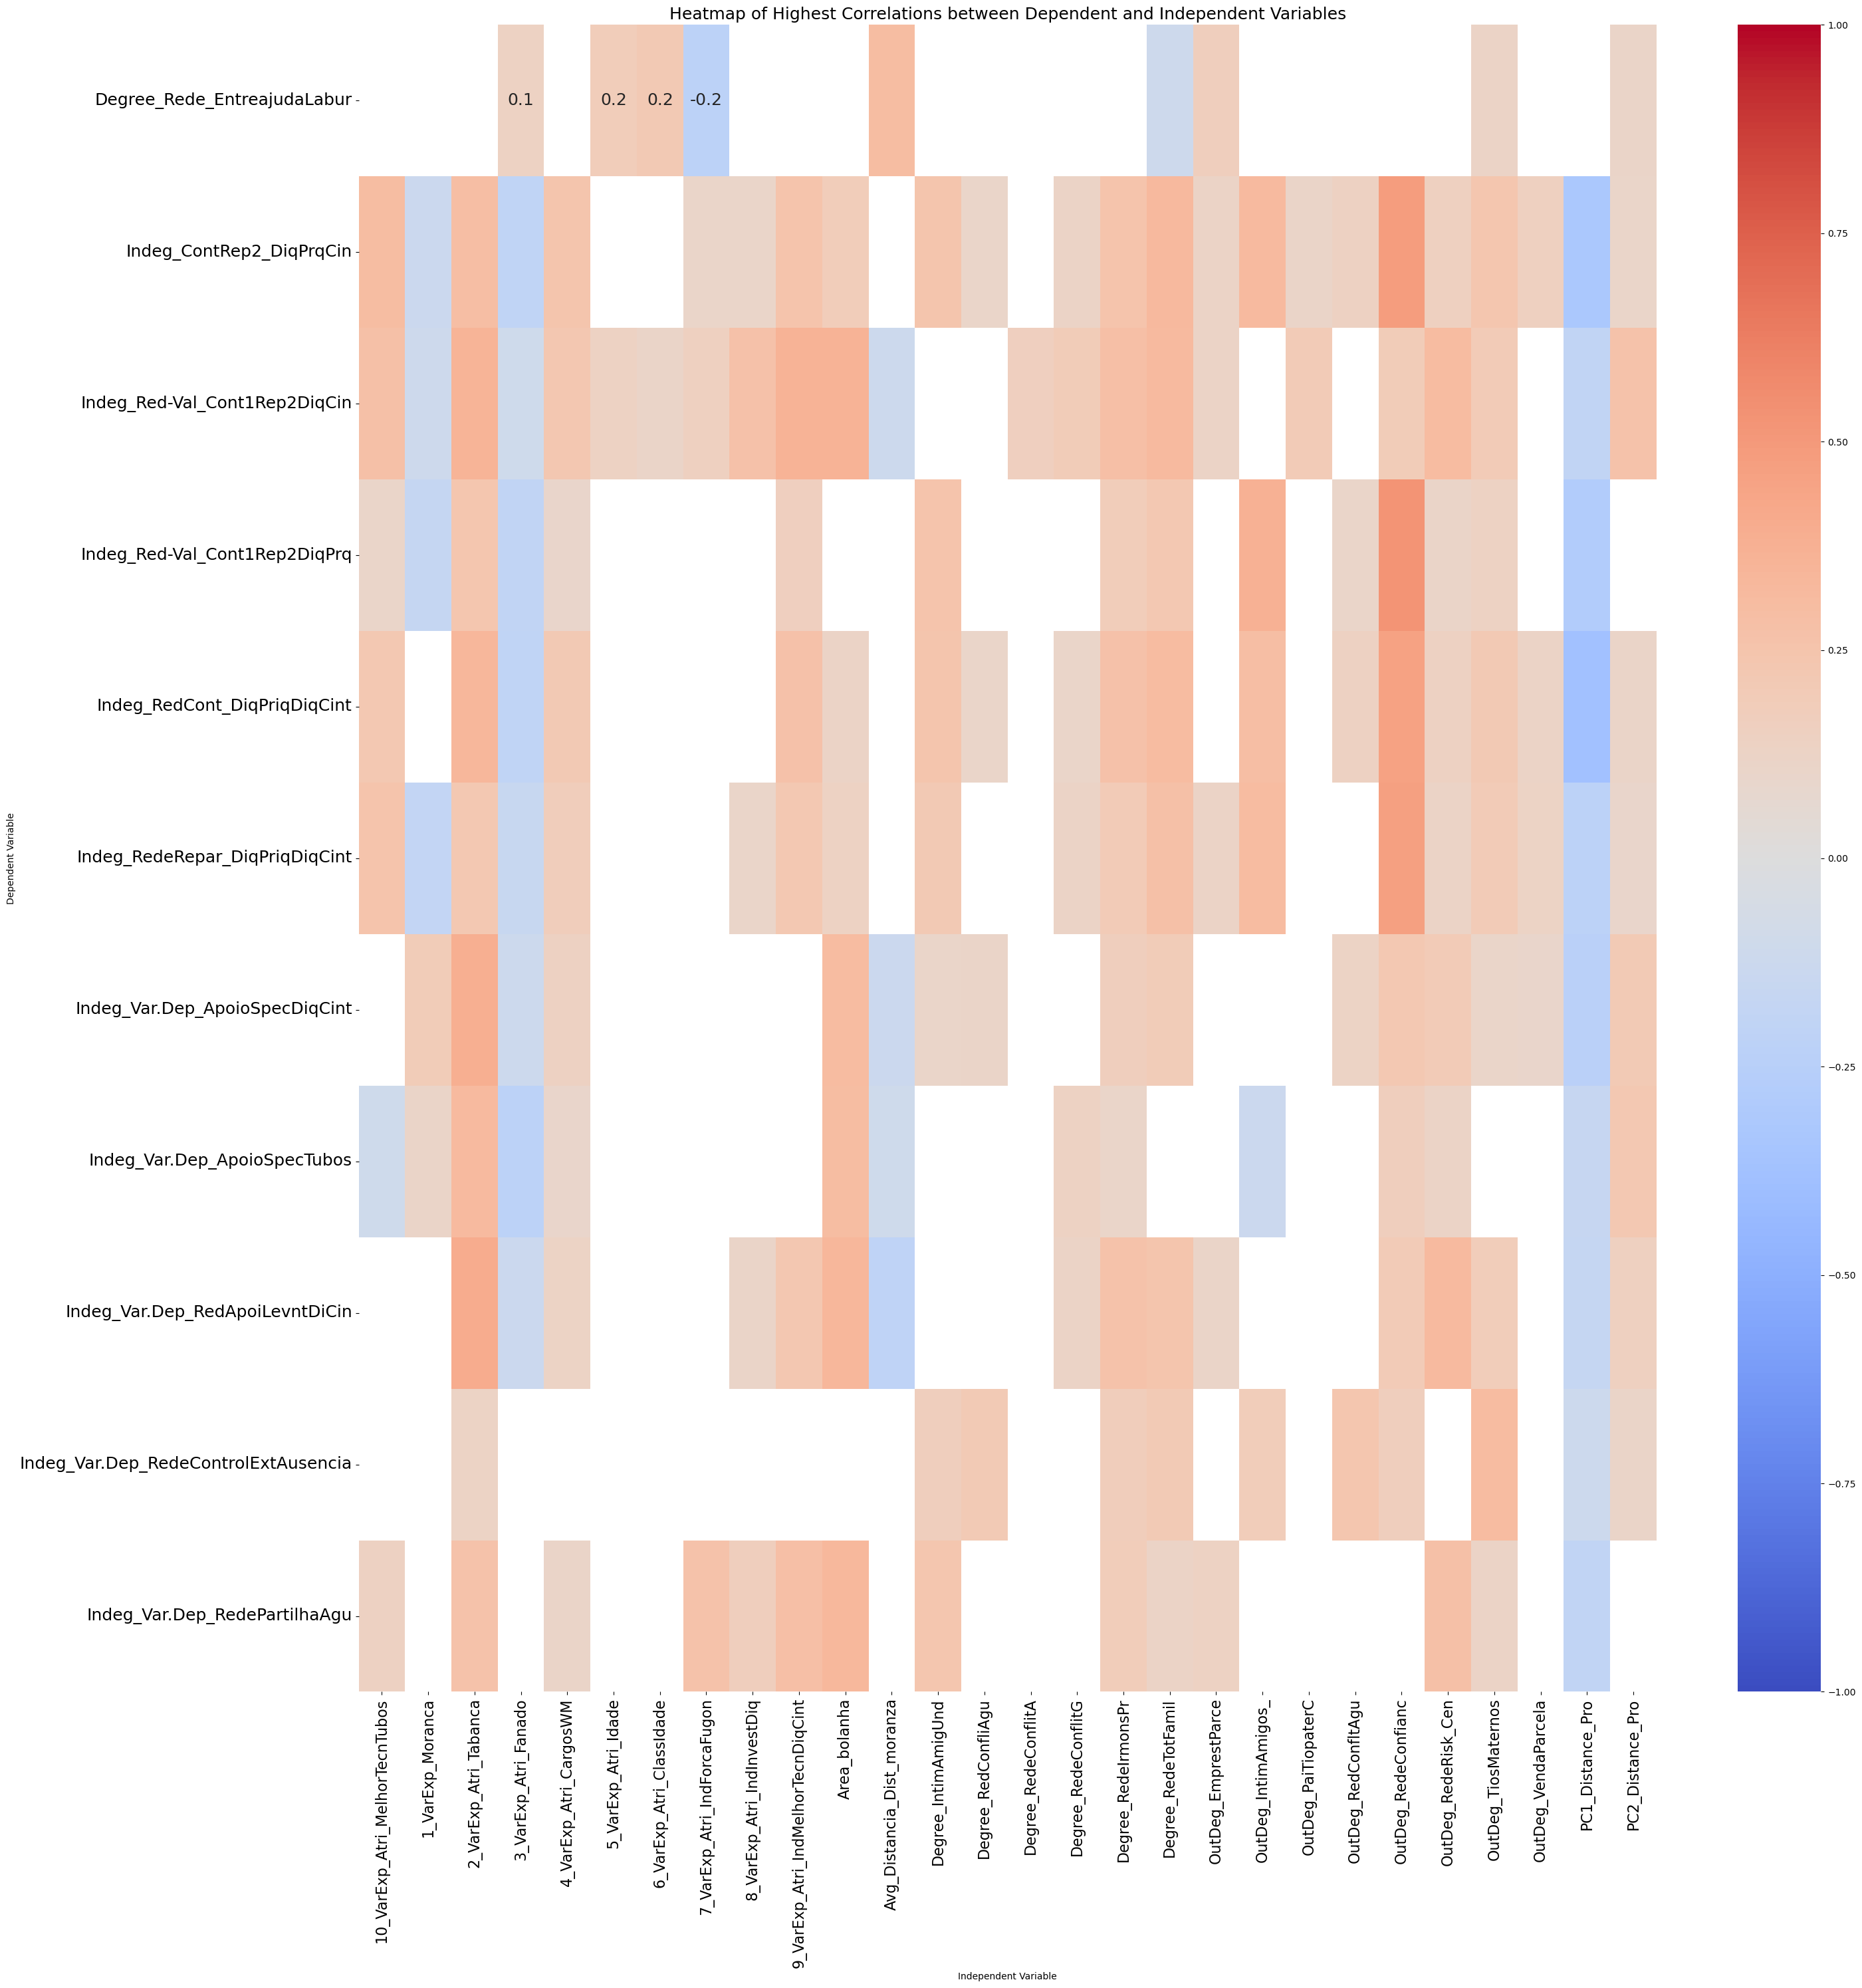

In [39]:
# Create a pivoted DataFrame from high_corr
high_corr_pivot = high_corr.pivot_table(index='Dependent Variable', columns='Independent Variable', values='Correlation')

# Save the pivoted DataFrame to a CSV file
output_path = "../Results/correlations_10.csv"
os.makedirs("../Results/", exist_ok=True)
try:
    high_corr_pivot.to_csv(output_path, index=True)
    print(f"File successfully saved at {output_path}.")
except Exception as e:
    print(f"Error saving the file: {e}")

# Adjust figure size and font size
plt.figure(figsize=(30, 30))  # Increase the figure size
sns.heatmap(high_corr_pivot, annot=True, fmt='.1f', cmap='coolwarm', center=0, vmin=-1, vmax=1, annot_kws={"size": 18})
plt.title('Heatmap of Highest Correlations between Dependent and Independent Variables', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=18)
plt.tight_layout()  # Adjust layout to avoid label cropping
plt.show()
